# <center>  Python for biologists

## Lecture 9, Numpy
28.10.2023


> Nikita Vaulin, vaulin@ro.ru, tg: @nvaulin
    

***Notion 0***. Feel free to start using shortcuts when working with Jupyter Notebook:
- To run the cell `Ctrl`+`Enter`
- To run the cell and step to the next one `Shift` + `Enter`
- To run the cell and create the new one `Alt` + `Enter`

There are two modes of action: cell-editing (the line on the left is green) and cell-selecting (the line on the left is blue). 

- cell-editing mode &#8594; `Esc` &#8594; cell-selecting mode
- cell-selecting mode &#8594; `Enter` &#8594; cell-editing mode

In cell-selecting mode you can:

- Delete  a cell - `DD`
- Undo deleting - `Z`


### <center> Let's move on!

---

## Numpy: numerical python

In [ ]:
! pip install numpy

Как обычно, это обычная папочка с обычным кодом на вашем компьютере:

In [1]:
import numpy
numpy.__file__

'/home/nvaulin/miniforge3/envs/python_bi/lib/python3.11/site-packages/numpy/__init__.py'

Хотя общая конвенция - импортировать его с алиасом `np`

In [2]:
import numpy as np 

У нас есть обычные списки в python

In [3]:
my_list = [1, 2, 4, 5]
print(my_list)
print(type(my_list))

[1, 2, 4, 5]
<class 'list'>


Массивы numpy можно считать как многомерное расширение списоков. Написанное на C. 

**Терминология** (часто-встречаемая):
- массив - `numpy`-массив
- вектор - одномерный `numpy`-массив
- матрица - двухмерный `numpy`-массив
- тензор - многомерный (ND, N>3)  `numpy`-массив
- сон - 0-мерный промежуток времени между выполнением домашек

In [4]:
my_array = np.array(my_list)
print(my_array)
print(type(my_array)) # N-dimensional

[1 2 4 5]
<class 'numpy.ndarray'>


Работать с ними можно как с обычными списками. Только все данные в массиве должны быть одного типа. 

In [6]:
np.array([1, 2, 'str', True]) # все перевелось к строке

array(['1', '2', 'str', 'True'], dtype='<U21')

In [7]:
my_array[0]

1

In [8]:
my_array[:2]

array([1, 2])

In [9]:
my_array[0] = 10
my_array

array([10,  2,  4,  5])

Фанфакт. Массивы в `numpy` это не просто корзинка с ссылками как у списков, это полноценный *Сишный* `array`. Поэтому менять значения в нем может быть на несколько наносекунд дольше. Потому что происходит полное перекладывание всего массива. Но это уже история про C, а не про Python

In [21]:
import time

In [23]:
%%timeit 

my_array[0] = 11

45.3 ns ± 0.624 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [24]:
%%timeit 

my_list[0] = 11

12.3 ns ± 0.0853 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


Делать с ними можно много разного:

In [26]:
my_array.sort()

In [27]:
my_array

array([ 2,  4,  5, 11])

In [28]:
print(my_array.sum())
print(my_array.prod())
print(my_array.mean())
print(my_array.std())

22
440
5.5
3.3541019662496847


In [11]:
matrix = np.array(
            [
                [1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]
            ]

)

In [12]:
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

##### Говорят, что размер имеет значение. Как узнать, какое значение имеет размер `numpy`-массива?

In [31]:
matrix.size

9

In [32]:
matrix.ndim # индексы: 0-ая 1-ая размерности (строки и столбцы)

2

In [33]:
matrix.shape

(3, 3)

In [34]:
my_array.shape

(4,)

Размеры (shape) - это кортеж. И разные кортежи значат разное:

(4, ) <- 1-D

(4, 1) <- 2-D

(4, 0) так не бывает

Почти все операции можно делать по конкретным осям, а не только в целом над массивом:

In [35]:
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [36]:
print(matrix.sum())

45


In [37]:
print(matrix.sum(axis=1))

[ 6 15 24]


In [38]:
print(matrix.sum(axis=0))

[12 15 18]


In [39]:
print(matrix.std(axis=1))

[0.81649658 0.81649658 0.81649658]


In [40]:
print(matrix.std(axis=0))

[2.44948974 2.44948974 2.44948974]


Тут давайте посоздаем массивов чтобы лучше понять что такое размерности

In [41]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [42]:
np.zeros((3, 1))

array([[0.],
       [0.],
       [0.]])

In [43]:
np.zeros((3, ))

array([0., 0., 0.])

In [44]:
np.zeros((1, 3))

array([[0., 0., 0.]])

In [48]:
ones = np.ones((2, 2, 2, 2, 3))

In [52]:
ones.sum()

48.0

In [56]:
ones.sum(axis=4).shape

(2, 2, 2, 2)

In [57]:
ones.sum(axis=4)

array([[[[3., 3.],
         [3., 3.]],

        [[3., 3.],
         [3., 3.]]],


       [[[3., 3.],
         [3., 3.]],

        [[3., 3.],
         [3., 3.]]]])

In [58]:
ones = np.ones((2, 3))

In [65]:
print(ones.shape)
ones

(2, 3)


array([[1., 1., 1.],
       [1., 1., 1.]])

In [63]:
print(ones.sum(axis=0).shape)
ones.sum(axis=0)

(3,)


array([2., 2., 2.])

In [64]:
print(ones.sum(axis=1).shape)
ones.sum(axis=1)

(2,)


array([3., 3.])

### Операции в numpy - векторизованные (как в R)

Сравите прибавление 1 к списку и к матрице:

In [66]:
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [67]:
[1, 2, 3] + 1

TypeError: can only concatenate list (not "int") to list

In [68]:
matrix + 1

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [69]:
matrix * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [14]:
( matrix * 2 ) + 1 

array([[ 3,  5,  7],
       [ 9, 11, 13],
       [15, 17, 19]])

Логические операции также векторизованы. Их можно выполнят чтобы создавать фильтрующие маски.

In [72]:
print(matrix)
print(matrix < 5)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ True  True  True]
 [ True False False]
 [False False False]]


In [78]:
matrix[matrix < 5]
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [77]:
mask = matrix < 5
print(mask)

[[ True  True  True]
 [ True False False]
 [False False False]]


In [75]:
matrix[mask]

array([1, 2, 3, 4])

In [76]:
matrix[~mask]

array([5, 6, 7, 8, 9])

In [80]:
print(matrix)
matrix[[True, True, False]]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2, 3],
       [4, 5, 6]])

In [82]:
print(matrix.shape)

(3, 3)


In [16]:
ones = np.ones((2, 3))

In [17]:
ones[[True, True]]

array([[1., 1., 1.],
       [1., 1., 1.]])

In [18]:
ones[[True, False]]

array([[1., 1., 1.]])

Здесь небольшое отвлечение чтобы все таки показать, что numpy дейсвительно выгоден по производительности:)
Создаем большой страшный список и что нибудь с ним делаем:

In [91]:
my_list = list(map(int, list('12345' * 10_000)))

In [92]:
len(my_list)

50000

In [93]:
my_array = np.array(my_list)

In [98]:
%%timeit

sum(my_list) # суммировать список - долго

197 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [99]:
%%timeit

sum(my_array) # суммировать массив функцией для список - еще дольше

2.1 ms ± 86.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [100]:
%%timeit

np.sum(my_array) # а вот суммировать массив функцией для массивов - очень приятно

8.98 µs ± 192 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Теперь поговорим про размеры данных (про память)

Занимаемым местом можно управлять, если выбирать разный тип данных 

In [102]:
import sys

In [103]:
sys.getsizeof(my_array)

400112

In [104]:
my_array.dtype

dtype('int64')

In [105]:
np.array(my_list, dtype='int32')

array([1, 2, 3, ..., 3, 4, 5], dtype=int32)

In [106]:
np.array(my_list, dtype=np.int32)

array([1, 2, 3, ..., 3, 4, 5], dtype=int32)

In [107]:
my_array.astype('int16')

array([1, 2, 3, ..., 3, 4, 5], dtype=int16)

In [118]:
sys.getsizeof(np.array(my_list, dtype='int32'))

200112

In [119]:
sys.getsizeof(np.array(my_list, dtype='int16'))

100112

In [120]:
my_array.astype('int8')

array([1, 2, 3, ..., 3, 4, 5], dtype=int8)

In [122]:
np.array([1, 2, 3, -4], dtype='int16')

array([ 1,  2,  3, -4], dtype=int16)

In [123]:
np.array([1, 2, 3, -4], dtype='uint16') # un_signed, варнинг из за отрицательного числа

/tmp/ipykernel_1312/2350628298.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -4 to uint16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([1, 2, 3, -4], dtype='uint16') # un_signed


array([    1,     2,     3, 65532], dtype=uint16)

In [19]:
np.array([1, 2, 3, 4], dtype='uint16')

array([1, 2, 3, 4], dtype=uint16)

Как узнать какие данные в каком формате можно хранить:

In [130]:
print(np.iinfo(np.int8))
print(np.iinfo(np.uint8))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------



> Задача

Какой тип данных подходит чтобы хранить координаты генома человека

In [20]:
print(np.iinfo(np.uint16)) #<- недобор
print(np.iinfo(np.uint32)) #<- в самый раз
print(np.iinfo(np.uint64)) #<- шибко перебор

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------

Machine parameters for uint32
---------------------------------------------------------------
min = 0
max = 4294967295
---------------------------------------------------------------

Machine parameters for uint64
---------------------------------------------------------------
min = 0
max = 18446744073709551615
---------------------------------------------------------------



In [136]:
max_ = 4294967295

print(f'{max_ = :.2e}') # сможем хранить чуть больше чем 4 мегабазы

max_ = 4.29e+09


In [137]:
max_ = 18446744073709551615
print(f'{max_ = :.2e}')

max_ = 1.84e+19


In [141]:
print(np.iinfo(np.int32))

max_ = 2147483647
print(f'{max_ = :.2e}')

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

max_ = 2.15e+09


In [145]:
print(np.finfo(np.float32))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------



### Матричные операции

In [147]:
print(matrix + matrix)

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [148]:
np.array([1, 2]) * np.array([1, 2])

array([1, 4])

In [149]:
arr1 = np.array([[1, 2],
                 [0, 1]]) 
arr2 = np.array([[2, 1],
                 [1, 1]]) 

In [150]:
arr1 * arr2

array([[2, 2],
       [0, 1]])

In [151]:
arr1 @ arr2

array([[4, 3],
       [1, 1]])

In [154]:
import matplotlib.pyplot as plt
from scipy import misc

img = misc.face()

/tmp/ipykernel_1312/1149508067.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


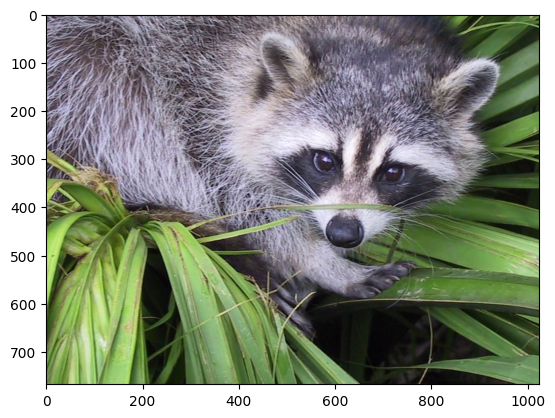

In [155]:
plt.imshow(img)

In [158]:
print(type(img))

<class 'numpy.ndarray'>


In [159]:
print(img.shape) # R G B | каждое 0 - 255

(768, 1024, 3)


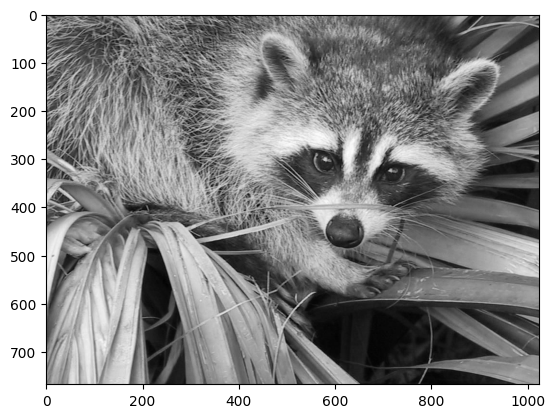

In [161]:
plt.imshow(img[:,:,1], cmap='gray')

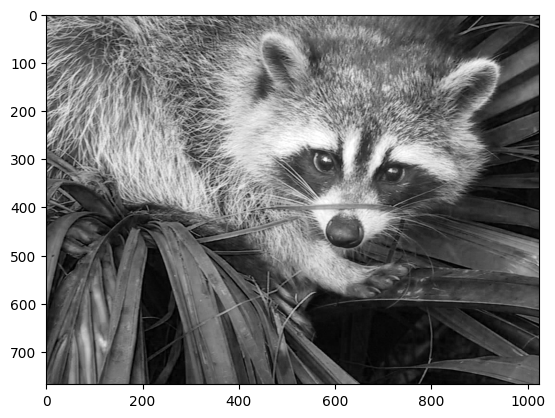

In [162]:
plt.imshow(img[:,:,2], cmap='gray')

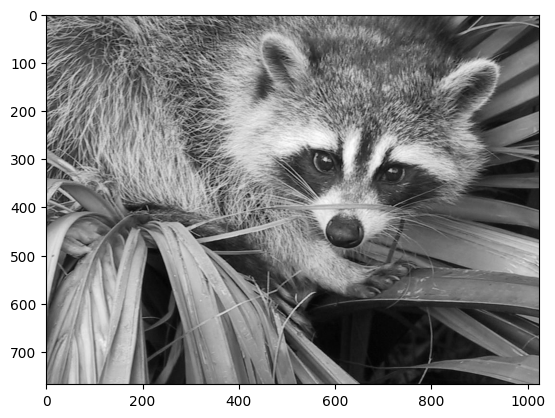

In [163]:
plt.imshow(0.2*img[:,:,0] + 0.7*img[:,:,1] + 0.07*img[:,:,2], cmap='gray')

In [166]:
img_grey = ( img / 255 ) @ [0.2126, 0.7152, 0.0722]

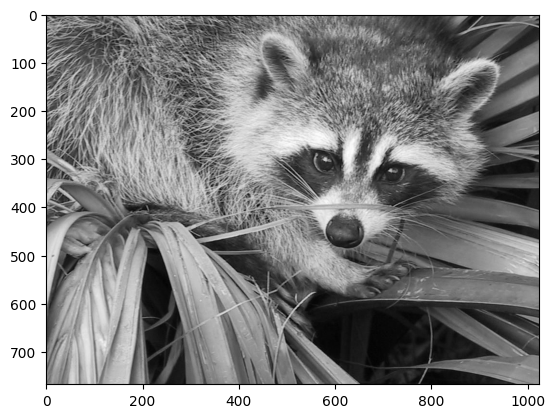

In [167]:
plt.imshow(img_grey, cmap='gray')

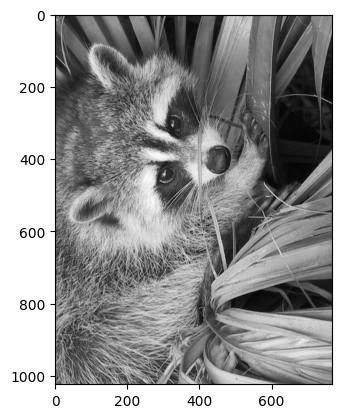

In [168]:
plt.imshow(np.rot90(img_grey), cmap='gray')

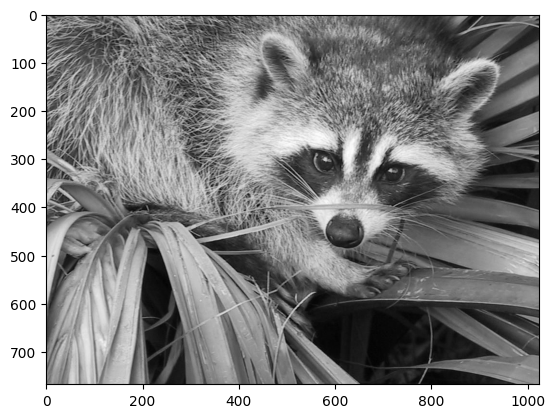

In [171]:
plt.imshow(img_grey, cmap='gray')